In [1]:
#Load Libraries
import pandas as pd
import numpy as np
import warnings
import string
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
#reading the dataset
data = pd.read_csv('Student_dataset1.csv')

In [3]:
data.head()

,Timestamp,Name(Optional),Age,Gender,Are you a Mount Carmel Student?,"Enter your combination (Eg : BCA, ECE, BA PyEE, BCOM Honors, etc.)",Year of joining,Year of completion,"Please enter your percentage for first semester,(please convert your cgpa into *percentage* and enter it!)",Please enter your percentage for previous semester(please convert your cgpa into percentage and enter it!),...,"On a scale of 1-5 , 1 being the least , how distracted were you by the following? [Social Media]","On a scale of 1-5 , 1 being the least , how distracted were you by the following? [Gaming]","On a scale of 1-5 , 1 being the least , how distracted were you by the following? [Sleeping]","On a scale of 1-5 , 1 being the least , how distracted were you by the following? [TV/Streaming on laptop]","On a scale of 1-5 , 1 being the least , how distracted were you by the following? [Snacking]",Do you listen to music while you are studying?,What were the difficulties faced while studying online?,Most Preferred days of learning?,"In a day , how much caffeine-related beverages do you consume?",The most comfortable mode of study
0,2022/03/25 11:24:16 AM GMT+5:30,Sandra,20,Female,No,PSEco,2020,2023,87.50,82.5,...,4,1,4,3,4,Sometimes,Short Attention span,Tuesday;Friday,2,Offline
1,2022/03/25 12:31:39 PM GMT+5:30,NaN,20,Female,No,BBA,2019,2022,80.01,89.0,...,4,3,5,3,2,No,Short Attention span,Tuesday,2,Online
2,2022/03/25 12:38:21 PM GMT+5:30,NaN,19,Female,No,PSEco,2020,2023,82.00,81.0,...,5,2,5,5,5,Sometimes,Short Attention span,Monday;Wednesday;Friday,2,Hybrid
3,2022/03/25 1:08:11 PM GMT+5:30,SG,21,Female,No,BDes in Human Centered Design,2020,2024,75.00,78.6,...,4,1,4,4,4,Yes,Short Attention span,Tuesday;Wednesday;Thursday;Friday;Saturday,5,Offline
4,2022/03/25 5:42:38 PM GMT+5:30,NaN,23,Male,No,ME,2017,2021,78.00,83.0,...,3,4,4,3,3,Yes,Short Attention span,Monday;Tuesday;Wednesday;Thursday;Friday,1,Hybrid


In [4]:
data.rename(columns={'Are you a Mount Carmel Student?': 'MCC_Student',
                   'Enter your combination (Eg : BCA, ECE, BA PyEE, BCOM Honors, etc.)': 'Combination',
                   'Year of joining':'Start_year',
                  'Year of completion':'End_year',
                    'Please enter your percentage for first semester,(please convert your cgpa into *percentage* and enter it!) ':'Perc_1',
                    'Please enter your percentage for previous semester(please convert your cgpa into percentage and enter it!) ':'Perc_prev',
                    'On a scale of 1-5 , 1 being the least , how distracted were you by the following? [Social Media]':'Distracted_social_media',
                    'On a scale of 1-5 , 1 being the least , how distracted were you by the following? [Gaming]':'Distracted_gaming',
                    'On a scale of 1-5 , 1 being the least , how distracted were you by the following? [Sleeping]':'Distracted_sleep',
                    'On a scale of 1-5 , 1 being the least , how distracted were you by the following? [TV/Streaming on laptop]':'Distracted_streaming',
                     'On a scale of 1-5 , 1 being the least , how distracted were you by the following? [Snacking]':'Distracted_snacking',
                    'Do you listen to music while you are studying?':'Music',
                    'What were the difficulties faced while studying online?':'Difficulties',
                     'Most Preferred days of learning?':'Learn_days',
                     'In a day , how much caffeine-related beverages do you consume?':'Coffee_consumption',
                     'The most comfortable mode of study':'Preferred_studymode',    
                     'Average time you spend studying/course related work in a day?':'Avg_time_studying',
                     'How productive were you during online classes?':'Productivity',
                     'What were your resources for studying during covid?':'Resources',
                     'On a scale of 1-5 , 1 being the least, how utilitarian were the following materials for your studies? [Text Books]':'Utilitarian_textbooks',
                     'On a scale of 1-5 , 1 being the least, how utilitarian were the following materials for your studies? [Online documented resources ]':'Utilitarian_onlinedoc',
                     'How conducive was your home environment for online classes?':'Conducive_env',
                     'On a scale of 1-5 , 1 being the least, how utilitarian were the following materials for your studies? [Tutorial websites, Journals and news articles]':'Utilitarian_websites',
                     'On a scale of 1-5 , 1 being the least, how utilitarian were the following materials for your studies? [Youtube(Topic related videos)]':'Utilitarian_youtube',
                     "On a scale of 1-5 , 1 being the least, teacher's performance based on constructive teaching [Online]":"Teacher_online",
                     "On a scale of 1-5 , 1 being the least, teacher's performance based on constructive teaching [Offline]":"Teacher_offline"

                    },
          inplace=True, errors='raise')

In [5]:
data.describe()

,Age,Start_year,End_year,Perc_1,Perc_prev,Avg_time_studying,Productivity,Utilitarian_textbooks,Utilitarian_onlinedoc,Utilitarian_websites,Utilitarian_youtube,Teacher_online,Teacher_offline,Conducive_env,Distracted_social_media,Distracted_gaming,Distracted_sleep,Distracted_streaming,Distracted_snacking,Coffee_consumption
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,20.613636,2019.022727,2022.272727,77.229773,79.493182,2.000000,2.477273,2.181818,3.318182,3.068182,3.386364,2.522727,3.636364,3.159091,3.454545,2.568182,3.522727,3.227273,3.159091,2.272727
std,1.224097,0.762146,0.817359,13.450588,13.660917,1.120631,1.067242,1.434990,1.094866,1.420739,1.315664,1.229268,0.990441,1.237837,1.247407,1.437014,1.130726,1.273407,1.292972,1.980881
min,18.000000,2017.000000,2020.000000,7.100000,7.900000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,20.000000,2019.000000,2022.000000,72.000000,75.000000,1.000000,2.000000,1.000000,3.000000,2.000000,3.000000,1.750000,3.000000,2.000000,2.750000,1.000000,3.000000,2.750000,2.000000,1.000000
50%,20.000000,2019.000000,2022.000000,80.505000,82.100000,2.000000,3.000000,1.500000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000
75%,21.000000,2019.000000,2023.000000,84.700000,87.000000,3.000000,3.000000,3.000000,4.000000,4.000000,5.000000,3.000000,4.000000,4.000000,5.000000,4.000000,4.250000,4.000000,4.000000,4.000000
max,25.000000,2021.000000,2024.000000,92.000000,96.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,7.000000


In [6]:
data.dtypes

Timestamp                   object
Name(Optional)              object
Age                          int64
Gender                      object
MCC_Student                 object
Combination                 object
Start_year                   int64
End_year                     int64
Perc_1                     float64
Perc_prev                  float64
Resources                   object
Avg_time_studying            int64
Productivity                 int64
Utilitarian_textbooks        int64
Utilitarian_onlinedoc        int64
Utilitarian_websites         int64
Utilitarian_youtube          int64
Teacher_online               int64
Teacher_offline              int64
Conducive_env                int64
Distracted_social_media      int64
Distracted_gaming            int64
Distracted_sleep             int64
Distracted_streaming         int64
Distracted_snacking          int64
Music                       object
Difficulties                object
Learn_days                  object
Coffee_consumption  

In [7]:
data.head()

,Timestamp,Name(Optional),Age,Gender,MCC_Student,Combination,Start_year,End_year,Perc_1,Perc_prev,...,Distracted_social_media,Distracted_gaming,Distracted_sleep,Distracted_streaming,Distracted_snacking,Music,Difficulties,Learn_days,Coffee_consumption,Preferred_studymode
0,2022/03/25 11:24:16 AM GMT+5:30,Sandra,20,Female,No,PSEco,2020,2023,87.50,82.5,...,4,1,4,3,4,Sometimes,Short Attention span,Tuesday;Friday,2,Offline
1,2022/03/25 12:31:39 PM GMT+5:30,NaN,20,Female,No,BBA,2019,2022,80.01,89.0,...,4,3,5,3,2,No,Short Attention span,Tuesday,2,Online
2,2022/03/25 12:38:21 PM GMT+5:30,NaN,19,Female,No,PSEco,2020,2023,82.00,81.0,...,5,2,5,5,5,Sometimes,Short Attention span,Monday;Wednesday;Friday,2,Hybrid
3,2022/03/25 1:08:11 PM GMT+5:30,SG,21,Female,No,BDes in Human Centered Design,2020,2024,75.00,78.6,...,4,1,4,4,4,Yes,Short Attention span,Tuesday;Wednesday;Thursday;Friday;Saturday,5,Offline
4,2022/03/25 5:42:38 PM GMT+5:30,NaN,23,Male,No,ME,2017,2021,78.00,83.0,...,3,4,4,3,3,Yes,Short Attention span,Monday;Tuesday;Wednesday;Thursday;Friday,1,Hybrid


In [8]:
data.isnull().sum()

Timestamp                   0
Name(Optional)             15
Age                         0
Gender                      0
MCC_Student                 0
Combination                 0
Start_year                  0
End_year                    0
Perc_1                      0
Perc_prev                   0
Resources                   0
Avg_time_studying           0
Productivity                0
Utilitarian_textbooks       0
Utilitarian_onlinedoc       0
Utilitarian_websites        0
Utilitarian_youtube         0
Teacher_online              0
Teacher_offline             0
Conducive_env               0
Distracted_social_media     0
Distracted_gaming           0
Distracted_sleep            0
Distracted_streaming        0
Distracted_snacking         0
Music                       0
Difficulties                0
Learn_days                  0
Coffee_consumption          0
Preferred_studymode         0
dtype: int64

In [9]:
data=data.drop(columns=['Name(Optional)', 'Timestamp'])

In [10]:
data.dtypes

Age                          int64
Gender                      object
MCC_Student                 object
Combination                 object
Start_year                   int64
End_year                     int64
Perc_1                     float64
Perc_prev                  float64
Resources                   object
Avg_time_studying            int64
Productivity                 int64
Utilitarian_textbooks        int64
Utilitarian_onlinedoc        int64
Utilitarian_websites         int64
Utilitarian_youtube          int64
Teacher_online               int64
Teacher_offline              int64
Conducive_env                int64
Distracted_social_media      int64
Distracted_gaming            int64
Distracted_sleep             int64
Distracted_streaming         int64
Distracted_snacking          int64
Music                       object
Difficulties                object
Learn_days                  object
Coffee_consumption           int64
Preferred_studymode         object
dtype: object

In [11]:
data['Age'].value_counts()

20    19
21    11
22     7
19     4
23     1
18     1
25     1
Name: Age, dtype: int64

In [12]:
data['Distracted_social_media'].describe()

count    44.000000
mean      3.454545
std       1.247407
min       1.000000
25%       2.750000
50%       3.000000
75%       5.000000
max       5.000000
Name: Distracted_social_media, dtype: float64

In [13]:
data['Distracted_gaming'].describe()

count    44.000000
mean      2.568182
std       1.437014
min       1.000000
25%       1.000000
50%       2.000000
75%       4.000000
max       5.000000
Name: Distracted_gaming, dtype: float64

In [14]:
data['Distracted_social_media'].describe()

count    44.000000
mean      3.454545
std       1.247407
min       1.000000
25%       2.750000
50%       3.000000
75%       5.000000
max       5.000000
Name: Distracted_social_media, dtype: float64

In [15]:
data['Distracted_sleep'].describe()

count    44.000000
mean      3.522727
std       1.130726
min       1.000000
25%       3.000000
50%       3.000000
75%       4.250000
max       5.000000
Name: Distracted_sleep, dtype: float64

In [16]:
data['Distracted_streaming'].describe()

count    44.000000
mean      3.227273
std       1.273407
min       1.000000
25%       2.750000
50%       3.000000
75%       4.000000
max       5.000000
Name: Distracted_streaming, dtype: float64

In [17]:
data['Distracted_snacking'].describe()

count    44.000000
mean      3.159091
std       1.292972
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Distracted_snacking, dtype: float64

In [18]:
data.columns

Index(['Age', 'Gender', 'MCC_Student', 'Combination', 'Start_year', 'End_year',
       'Perc_1', 'Perc_prev', 'Resources', 'Avg_time_studying', 'Productivity',
       'Utilitarian_textbooks', 'Utilitarian_onlinedoc',
       'Utilitarian_websites', 'Utilitarian_youtube', 'Teacher_online',
       'Teacher_offline', 'Conducive_env', 'Distracted_social_media',
       'Distracted_gaming', 'Distracted_sleep', 'Distracted_streaming',
       'Distracted_snacking', 'Music', 'Difficulties', 'Learn_days',
       'Coffee_consumption', 'Preferred_studymode'],
      dtype='object')

In [19]:
data['perc_mean']=data.apply(lambda x: (x['Perc_1']+x['Perc_prev'])/2,axis=1)

In [20]:
data.head()

,Age,Gender,MCC_Student,Combination,Start_year,End_year,Perc_1,Perc_prev,Resources,Avg_time_studying,...,Distracted_gaming,Distracted_sleep,Distracted_streaming,Distracted_snacking,Music,Difficulties,Learn_days,Coffee_consumption,Preferred_studymode,perc_mean
0,20,Female,No,PSEco,2020,2023,87.50,82.5,Laptops/PC,2,...,1,4,3,4,Sometimes,Short Attention span,Tuesday;Friday,2,Offline,85.000
1,20,Female,No,BBA,2019,2022,80.01,89.0,Text Books;Tablets/ipad;Laptops/PC;Mobile Phones,2,...,3,5,3,2,No,Short Attention span,Tuesday,2,Online,84.505
2,19,Female,No,PSEco,2020,2023,82.00,81.0,Laptops/PC,1,...,2,5,5,5,Sometimes,Short Attention span,Monday;Wednesday;Friday,2,Hybrid,81.500
3,21,Female,No,BDes in Human Centered Design,2020,2024,75.00,78.6,Laptops/PC;Mobile Phones,4,...,1,4,4,4,Yes,Short Attention span,Tuesday;Wednesday;Thursday;Friday;Saturday,5,Offline,76.800
4,23,Male,No,ME,2017,2021,78.00,83.0,Laptops/PC,1,...,4,4,3,3,Yes,Short Attention span,Monday;Tuesday;Wednesday;Thursday;Friday,1,Hybrid,80.500


In [21]:
data['difference']=data.apply(lambda x: x['Perc_1']-x['Perc_prev'],axis=1)

In [22]:
data['inc/dec']=data.apply(lambda x: 1 if x['difference'] >= 0 else 0,axis=1)

1 means the performance has increased
0 means the performance has decreased
Why Axis = 1?
Row means 0 and column means 1

In [23]:
data.head()

,Age,Gender,MCC_Student,Combination,Start_year,End_year,Perc_1,Perc_prev,Resources,Avg_time_studying,...,Distracted_streaming,Distracted_snacking,Music,Difficulties,Learn_days,Coffee_consumption,Preferred_studymode,perc_mean,difference,inc/dec
0,20,Female,No,PSEco,2020,2023,87.50,82.5,Laptops/PC,2,...,3,4,Sometimes,Short Attention span,Tuesday;Friday,2,Offline,85.000,5.00,1
1,20,Female,No,BBA,2019,2022,80.01,89.0,Text Books;Tablets/ipad;Laptops/PC;Mobile Phones,2,...,3,2,No,Short Attention span,Tuesday,2,Online,84.505,-8.99,0
2,19,Female,No,PSEco,2020,2023,82.00,81.0,Laptops/PC,1,...,5,5,Sometimes,Short Attention span,Monday;Wednesday;Friday,2,Hybrid,81.500,1.00,1
3,21,Female,No,BDes in Human Centered Design,2020,2024,75.00,78.6,Laptops/PC;Mobile Phones,4,...,4,4,Yes,Short Attention span,Tuesday;Wednesday;Thursday;Friday;Saturday,5,Offline,76.800,-3.60,0
4,23,Male,No,ME,2017,2021,78.00,83.0,Laptops/PC,1,...,3,3,Yes,Short Attention span,Monday;Tuesday;Wednesday;Thursday;Friday,1,Hybrid,80.500,-5.00,0


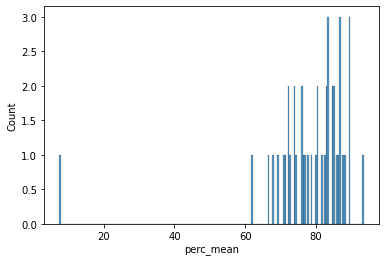

In [24]:
sns.histplot(data['perc_mean'], kde = False, bins = 200)
plt.show()

Text(0, 0.5, 'Frequency')

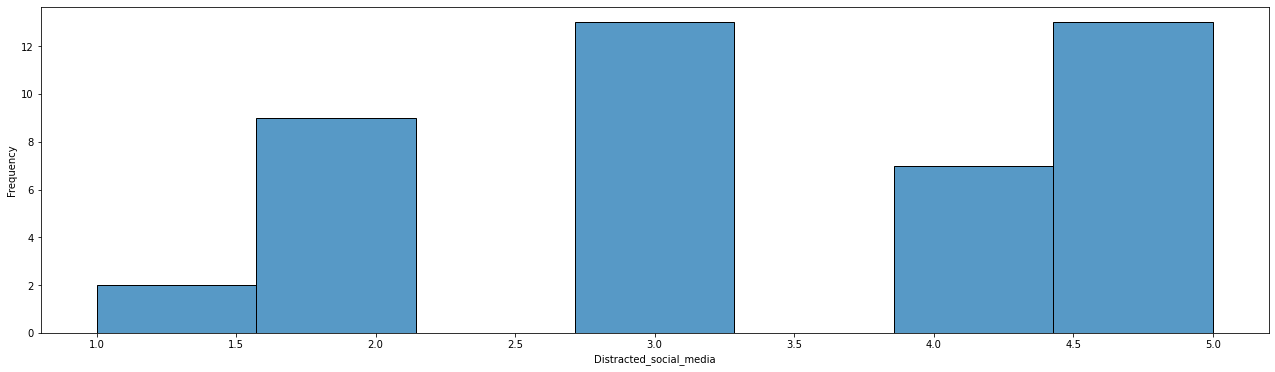

In [25]:
# Binary Features
plt.figure(figsize=(22, 6))
#fig, axs = plt.subplot(ncols=2)

# Distracted Social Media

sns.histplot(data['Distracted_social_media'])
plt.xlabel('Distracted_social_media')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

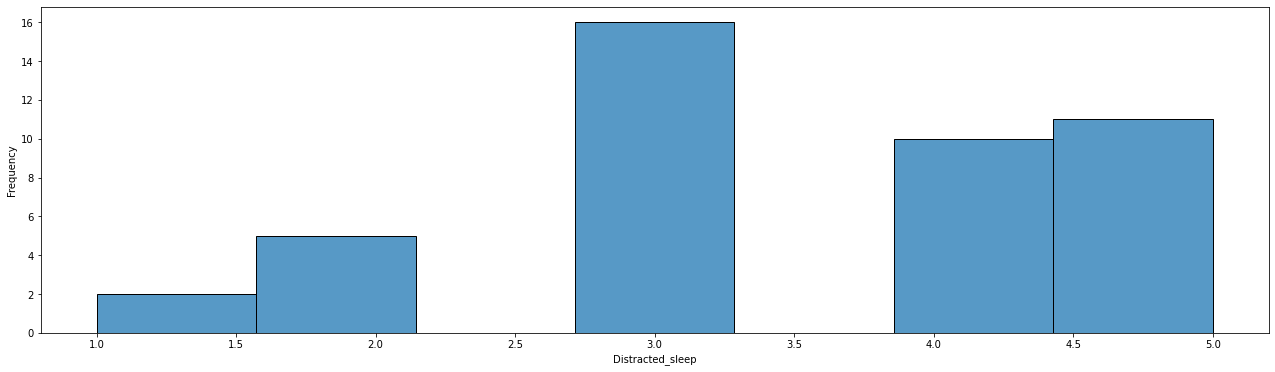

In [26]:
# Distracted Sleep
plt.figure(figsize=(22, 6))

sns.histplot(data['Distracted_sleep'])
plt.xlabel('Distracted_sleep')
plt.ylabel('Frequency')

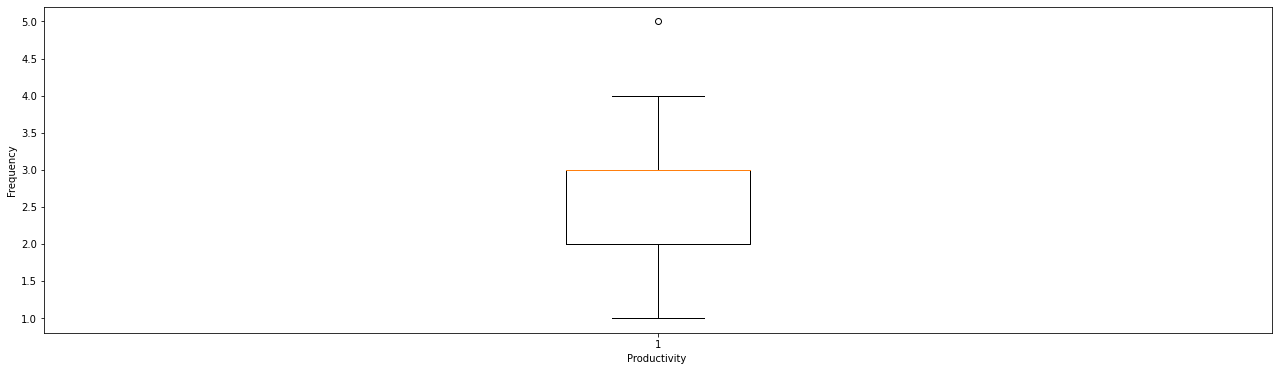

In [27]:
#Box_Plot on Productivity
plt.figure(figsize=(22, 6))

plt.boxplot(data['Productivity'])
plt.xlabel('Productivity ')
plt.ylabel('Frequency')
plt.show()

In [28]:
data.columns

Index(['Age', 'Gender', 'MCC_Student', 'Combination', 'Start_year', 'End_year',
       'Perc_1', 'Perc_prev', 'Resources', 'Avg_time_studying', 'Productivity',
       'Utilitarian_textbooks', 'Utilitarian_onlinedoc',
       'Utilitarian_websites', 'Utilitarian_youtube', 'Teacher_online',
       'Teacher_offline', 'Conducive_env', 'Distracted_social_media',
       'Distracted_gaming', 'Distracted_sleep', 'Distracted_streaming',
       'Distracted_snacking', 'Music', 'Difficulties', 'Learn_days',
       'Coffee_consumption', 'Preferred_studymode', 'perc_mean', 'difference',
       'inc/dec'],
      dtype='object')

In [29]:
# Custom function for visualisation of Categorical Variables 
def UVA_category(data, var_group): 
     
  # setting figure_size 
  size = len(var_group) 
  plt.figure(figsize = (7*size,5), dpi = 100) 
 
  # for every variable 
  for j,i in enumerate(var_group): 
    norm_count = data[i].value_counts(normalize = True) 
    n_uni = data[i].nunique() 
 
  #Plotting the variable with every information 
    plt.subplot(1,size,j+1) 
    sns.barplot(norm_count, norm_count.index , order = norm_count.index) 
    plt.xlabel('fraction/percent', fontsize = 10) 
    plt.ylabel('{}'.format(i), fontsize = 10) 
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

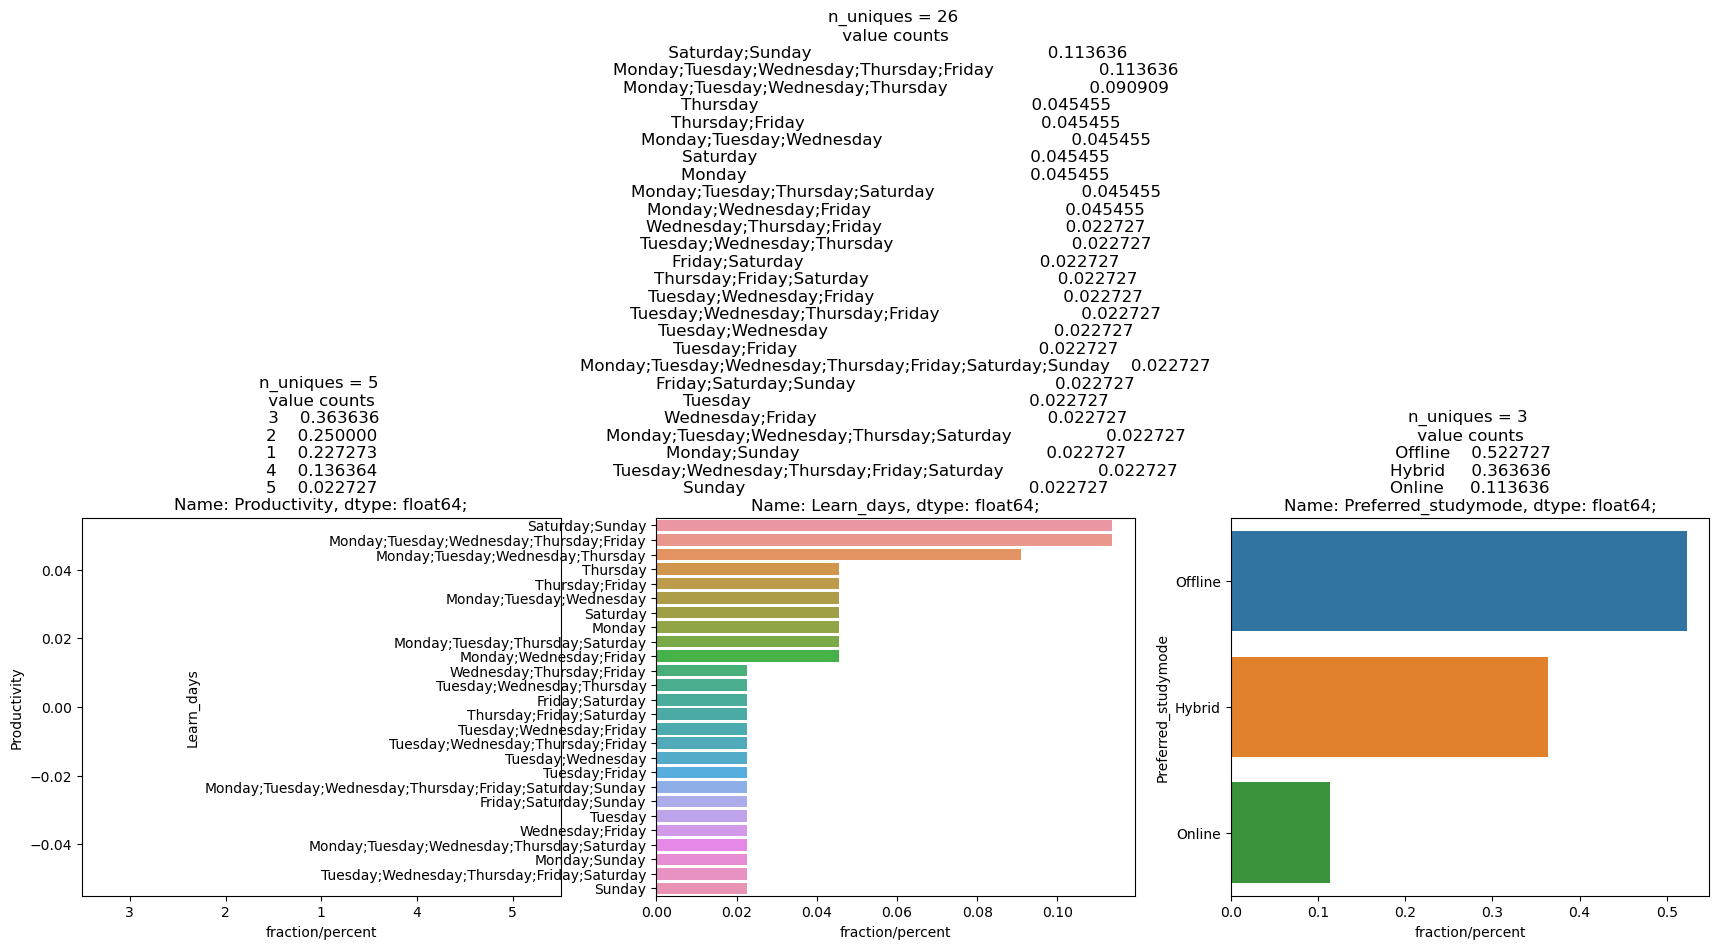

In [30]:
UVA_category(data, ['Productivity','Learn_days','Preferred_studymode'])

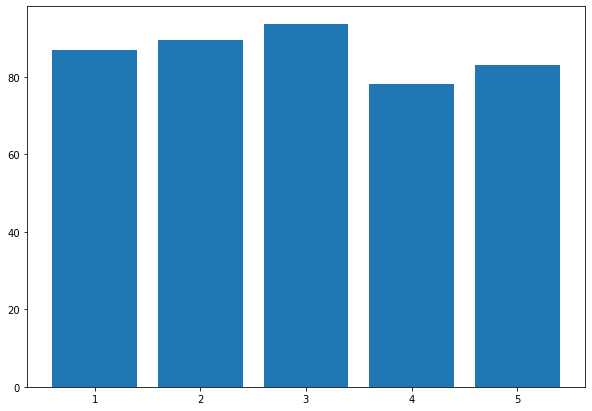

In [31]:
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(data['Productivity'],data['perc_mean'])
# Show Plot
plt.show()

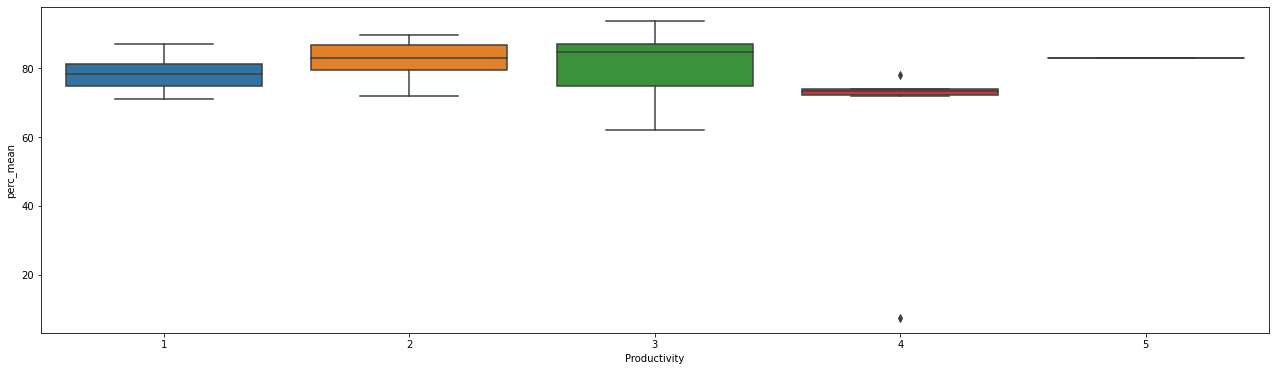

In [32]:
plt.figure(figsize=(22, 6))
sns.boxplot(x="Productivity", y="perc_mean", data=data)
plt.show()

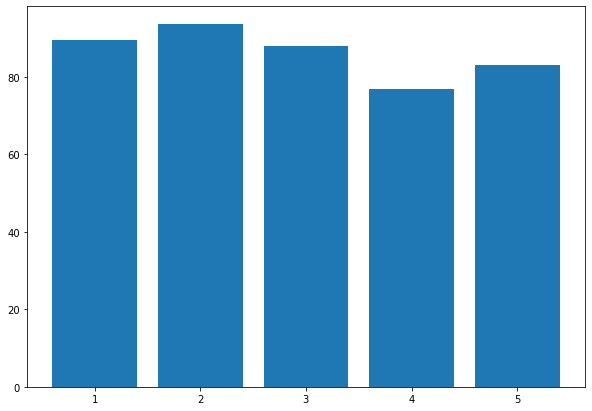

In [33]:
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(data['Avg_time_studying'],data['perc_mean'])
# Show Plot
plt.show()

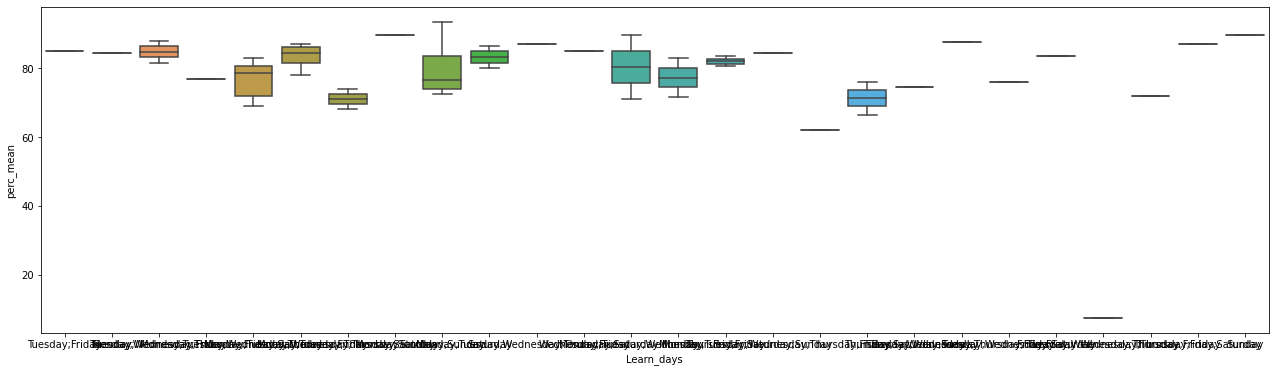

In [34]:
plt.figure(figsize=(22,6))
sns.boxplot(x="Learn_days", y="perc_mean", data=data)
plt.show()

<AxesSubplot:xlabel='Learn_days'>

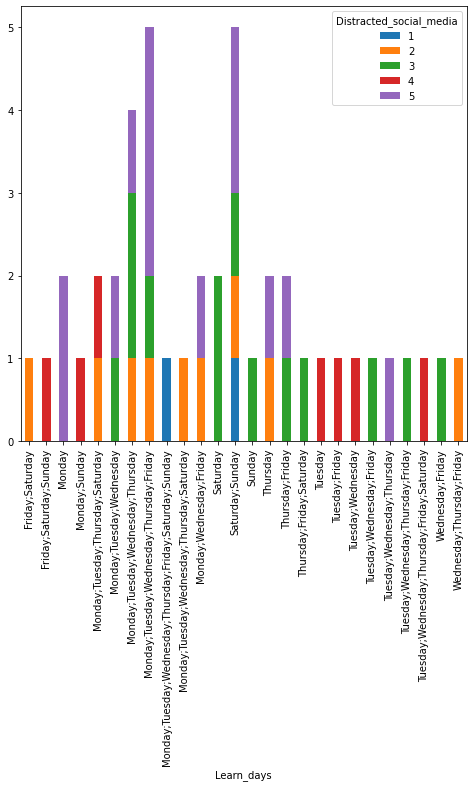

In [35]:
# using a crosstab to analyse the categorical varriables 
learn_days_socialmedia= pd.crosstab(index=data['Learn_days'],columns=data['Distracted_social_media']) 
learn_days_socialmedia.plot(kind="bar",figsize=(8,8), stacked=True)

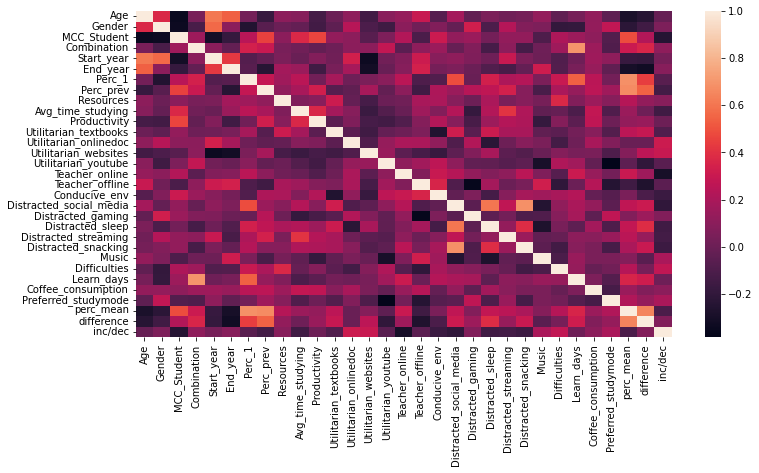

In [36]:
plt.figure(figsize=(12, 6)) 
corr = data.apply(lambda x: pd.factorize(x)[0]).corr() 
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [37]:
data.to_excel('data_cleaned.xlsx')